In [34]:
import os
import sys
import requests
import pandas as pd
import numpy as np
import QuantLib as ql
from pathlib import Path
from datetime import datetime
from datetime import timedelta
from model_settings import ms
notebook_dir = str(Path().resolve())

symbol='SPY'
url = str(
	'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='+
	symbol+'&outputsize=full&apikey='+
	ms.av_key)
r = requests.get(url)
spots = pd.Series(pd.DataFrame(r.json()['Time Series (Daily)']).transpose()['4. close'].squeeze())
spots = pd.to_numeric(spots,errors='coerce')
print(spots)

2024-10-11    579.5800
2024-10-10    576.1300
2024-10-09    577.1400
2024-10-08    573.1700
2024-10-07    567.8000
                ...   
1999-11-05    137.8750
1999-11-04    136.5312
1999-11-03    135.5000
1999-11-02    134.5937
1999-11-01    135.5625
Name: 4. close, Length: 6277, dtype: float64


# example data collection

let us collect a few recent trading days and inspect the data

In [44]:
dates = spots.index
dates = dates[:10]
for date in dates:
    print(date)

2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04
2024-10-03
2024-10-02
2024-10-01
2024-09-30


In [45]:
from historical_alphaVantage_collection import collect_av_link
chain = {}
for date in dates:
    spot = float(spots[date])
    link = collect_av_link(date,spot,symbol)
    printdate = datetime.strptime(date, '%Y-%m-%d').strftime('%A, %Y-%m-%d')
    chain[date] = link

In [46]:
print(type(chain))
for key in chain.keys():
    print(key)

<class 'dict'>
2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04
2024-10-03
2024-10-02
2024-10-01
2024-09-30


In [47]:
contracts = []
for key,link in chain.items():
    contracts.append(link['raw_data'])
contracts = pd.concat(contracts,ignore_index=True)
contracts

,contractID,symbol,expiration,strike,type,last,mark,bid,bid_size,ask,ask_size,volume,open_interest,date,implied_volatility,delta,gamma,theta,vega,rho
0,SPY241011C00300000,SPY,2024-10-11,300.00,call,276.08,279.26,278.75,1,279.78,1,17,0,2024-10-11,3.87113,1.00000,0.00000,-0.14488,0.00000,0.00822
1,SPY241011P00300000,SPY,2024-10-11,300.00,put,0.00,0.01,0.00,0,0.01,3520,0,2009,2024-10-11,3.79825,-0.00032,0.00001,-0.24831,0.00036,-0.00001
2,SPY241011C00305000,SPY,2024-10-11,305.00,call,0.00,274.26,273.75,1,274.78,1,0,0,2024-10-11,3.80190,1.00000,0.00000,-0.14730,0.00000,0.00836
3,SPY241011P00305000,SPY,2024-10-11,305.00,put,0.00,0.01,0.00,0,0.01,194,0,1211,2024-10-11,3.70755,-0.00033,0.00001,-0.24781,0.00037,-0.00001
4,SPY241011C00310000,SPY,2024-10-11,310.00,call,0.00,269.26,268.75,1,269.78,1,0,0,2024-10-11,3.73267,1.00000,0.00000,-0.14971,0.00000,0.00849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98081,SPY270115P00890000,SPY,2027-01-15,890.00,put,0.00,316.88,314.50,1,319.27,10,0,0,2024-09-30,0.45839,-0.55006,0.00099,-0.03822,3.43890,-14.50358
98082,SPY270115C00895000,SPY,2027-01-15,895.00,call,0.00,1.21,0.90,10,1.52,221,0,0,2024-09-30,0.11449,0.03297,0.00074,-0.02451,0.63913,0.40597
98083,SPY270115P00895000,SPY,2027-01-15,895.00,put,0.00,321.88,319.50,1,324.27,10,0,0,2024-09-30,0.46266,-0.55022,0.00098,-0.03894,3.43872,-14.62092
98084,SPY270115C00900000,SPY,2027-01-15,900.00,call,1.00,1.00,0.85,1,1.15,1,206,8,2024-09-30,0.11251,0.02826,0.00066,-0.02115,0.56259,0.34888


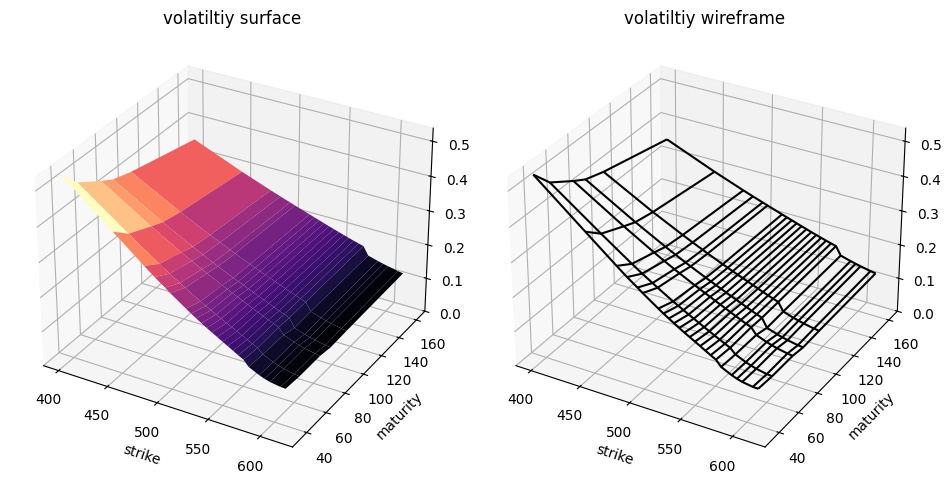

<Figure size 640x480 with 0 Axes>

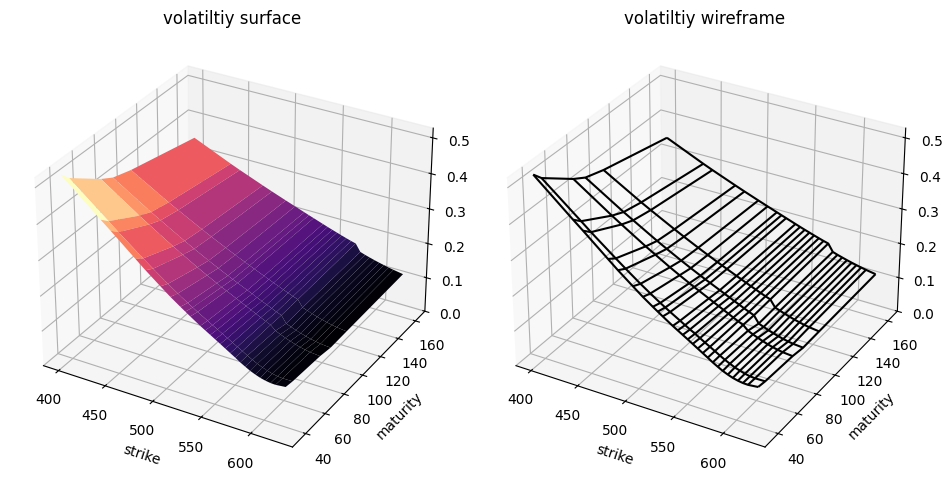

<Figure size 640x480 with 0 Axes>

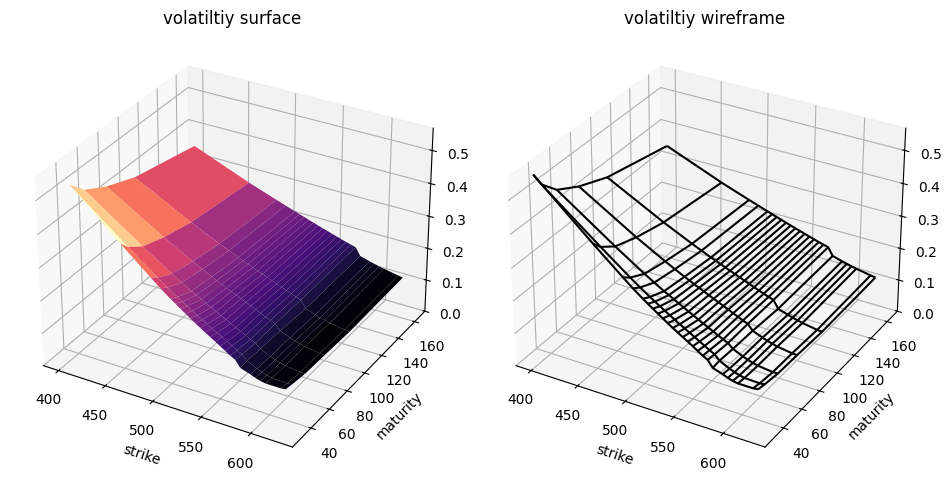

<Figure size 640x480 with 0 Axes>

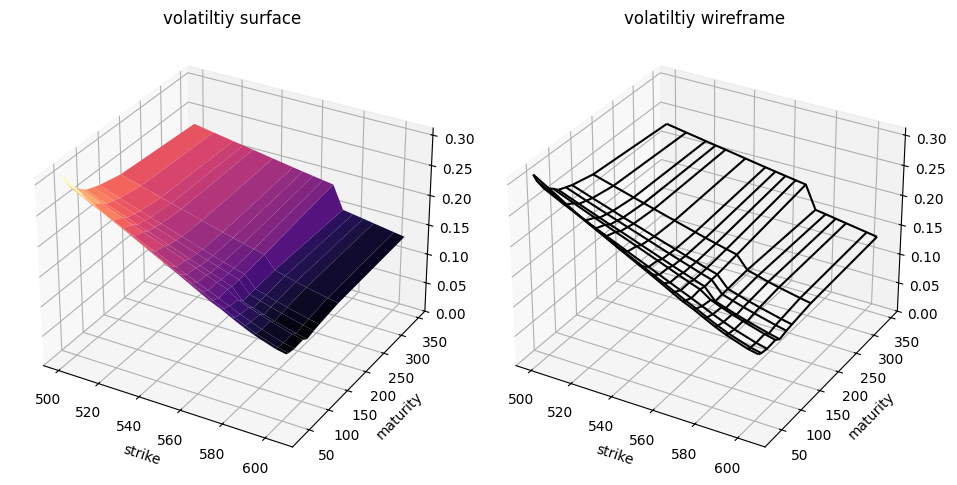

<Figure size 640x480 with 0 Axes>

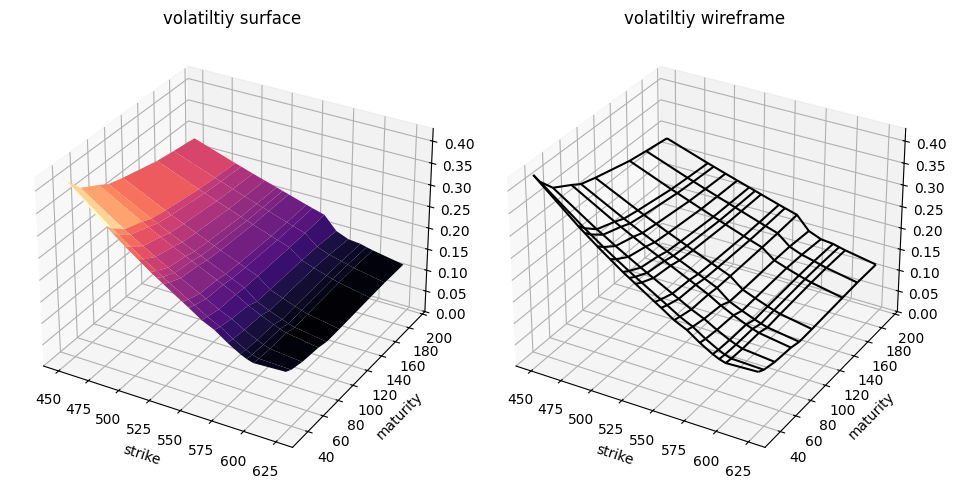

<Figure size 640x480 with 0 Axes>

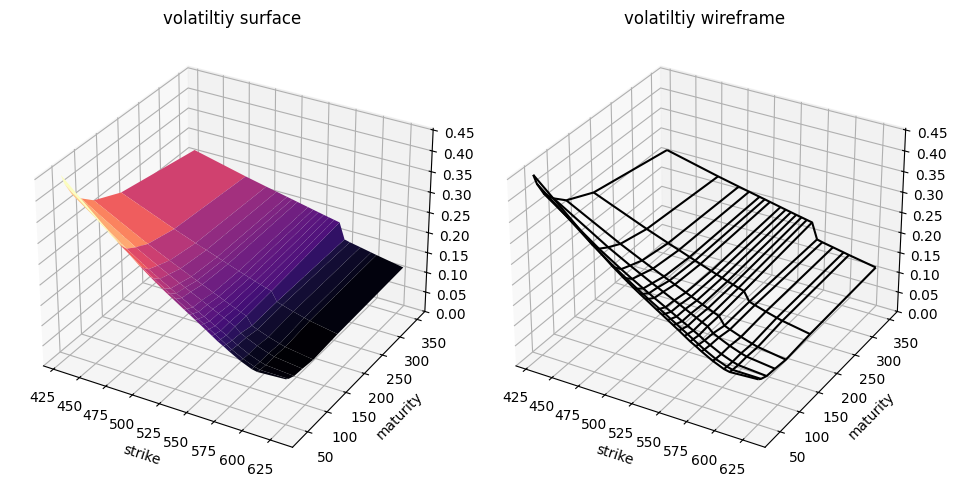

<Figure size 640x480 with 0 Axes>

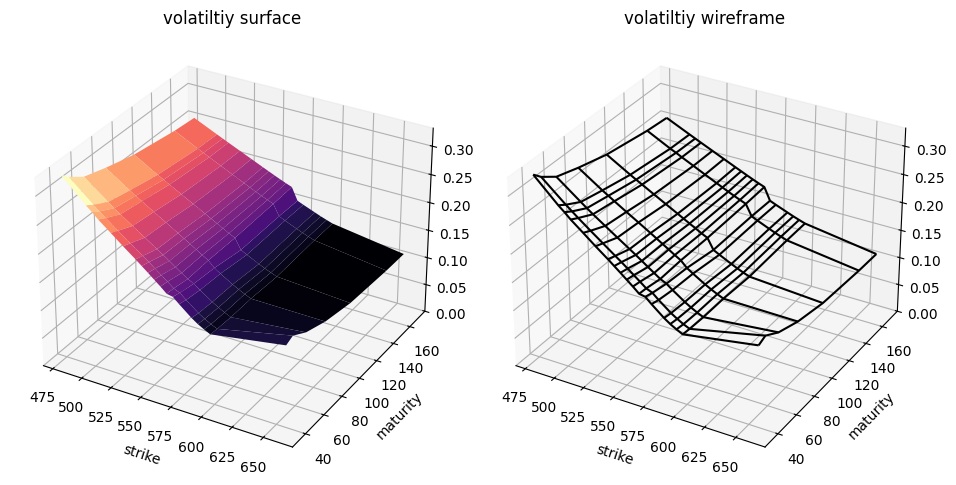

<Figure size 640x480 with 0 Axes>

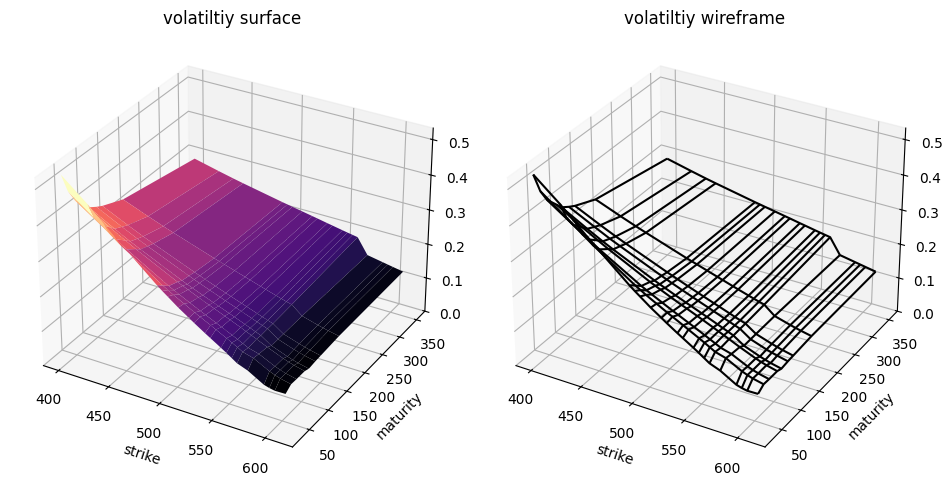

<Figure size 640x480 with 0 Axes>

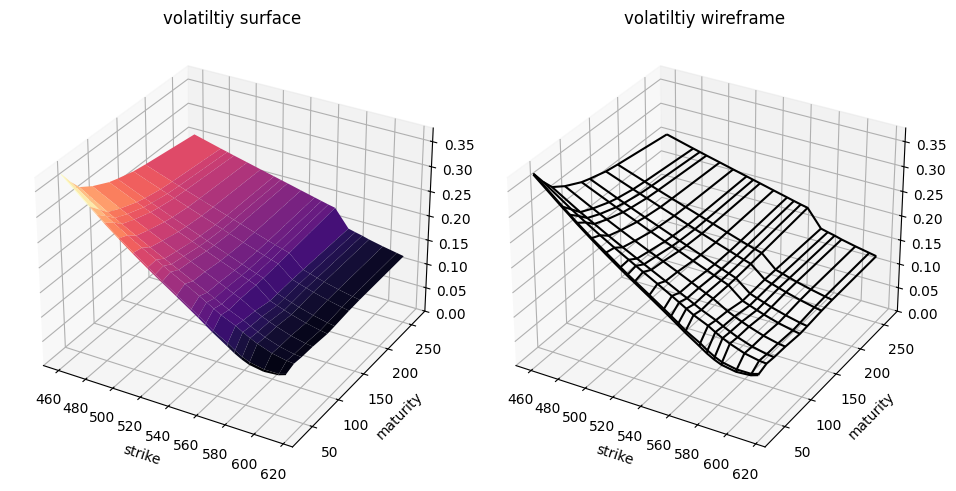

<Figure size 640x480 with 0 Axes>

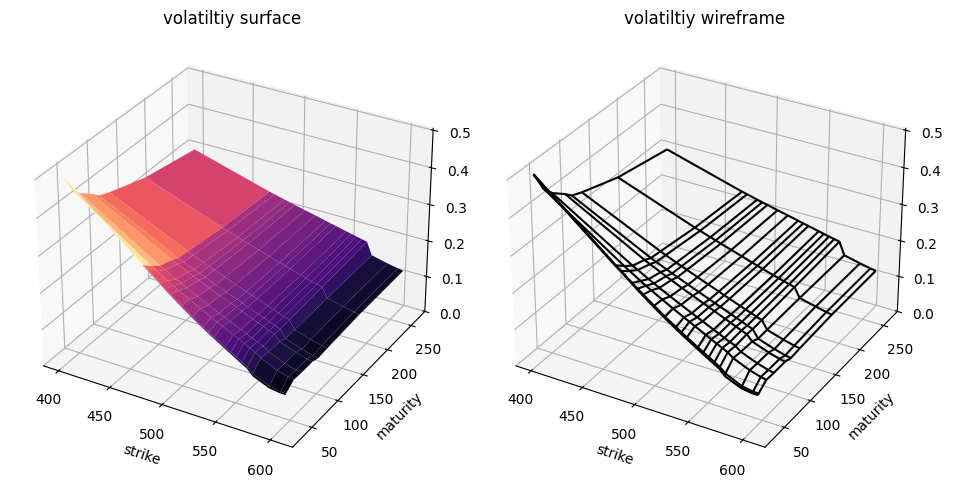

<Figure size 640x480 with 0 Axes>

In [48]:
from historical_av_plot_vol_surface import plot_vol_surface
for key,link in chain.items():
    plot_vol_surface(link['surface'])

# example calibraion

now why not select the one trading day and porceed with an example calibration of our Heston (1993) model

Tuesday, October 8th, 2024

SPY spot price: 573.17

           31       38       52       73       84       101      115      164  \
500.0  0.31159  0.29803  0.27851  0.26617  0.25839  0.25336  0.24940  0.24071   
510.0  0.29117  0.27928  0.26144  0.25199  0.24513  0.24086  0.23751  0.23095   
520.0  0.27013  0.26098  0.24544  0.23827  0.23217  0.22882  0.22608  0.22120   
525.0  0.26083  0.25199  0.23781  0.23156  0.22577  0.22288  0.22013  0.21632   
530.0  0.25138  0.24330  0.23004  0.22486  0.21983  0.21693  0.21464  0.21160   
540.0  0.23278  0.22608  0.21495  0.21160  0.20718  0.20519  0.20352  0.20199   
550.0  0.21495  0.20931  0.20016  0.19818  0.19452  0.19330  0.19239  0.19254   
555.0  0.20580  0.20077  0.19254  0.19147  0.18812  0.18751  0.18690  0.18797   
560.0  0.19650  0.19224  0.18492  0.18461  0.18187  0.18187  0.18157  0.18355   
565.0  0.18705  0.18340  0.17745  0.17791  0.17577  0.17608  0.17623  0.17928   
570.0  0.17776  0.17471  0.16998  0.17166  0.16968  0.170

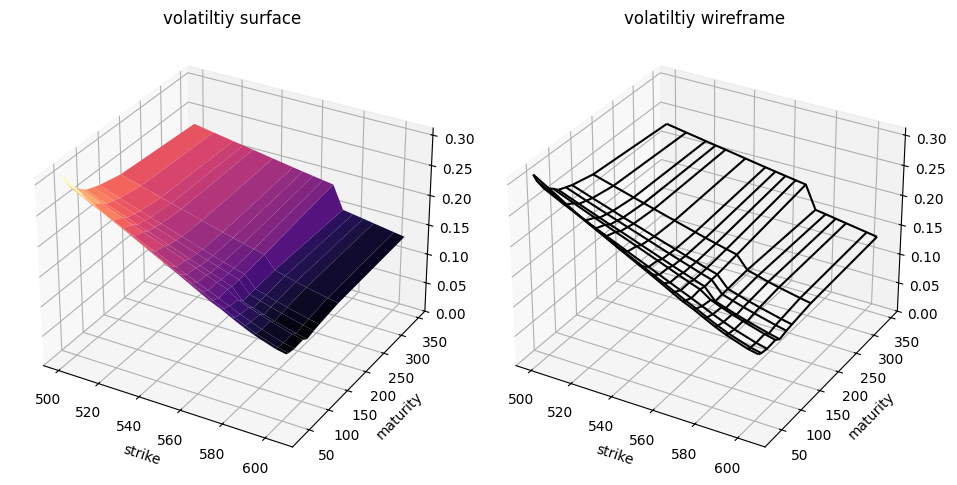

<Figure size 640x480 with 0 Axes>

In [55]:
date = dates[3]
calculation_datetime = datetime.strptime(date,'%Y-%m-%d')
calculation_date = ql.Date(
    calculation_datetime.day,
    calculation_datetime.month,
    calculation_datetime.year,
)
print(str(calculation_datetime.strftime('%A, '))+str(calculation_date))
vol_matrix = chain[date]['surface']
raw_data = chain[date]['raw_data']
contracts = chain[date]['hottest_contracts']
s = float(contracts['spot_price'].unique()[0])
print(f"\n{symbol} spot price: {s}")
print(f"\n{vol_matrix}\n")
plot_vol_surface(vol_matrix)

In [56]:
vol_matrix = vol_matrix.sort_index().drop_duplicates()
pd.to_numeric(raw_data['last'])
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['expiration'] = pd.to_datetime(raw_data['expiration'])
raw_data['implied_volatility'] = pd.to_numeric(raw_data['implied_volatility']).astype(float)
raw_data['strike'] = pd.to_numeric(raw_data['strike'])
raw_data['last'] = pd.to_numeric(raw_data['last'])
contract_maturities = np.array((raw_data['expiration'] - raw_data['date']) / timedelta(days=1)).astype(int)
raw_data['days_to_maturity'] = contract_maturities

T = vol_matrix.columns.tolist()
K = vol_matrix.index.tolist()
r = 0.04
g = 0.0

ql.Settings.instance().evaluationDate = calculation_date
flat_ts, dividend_ts = ms.ql_ts_rg(r, g, calculation_date)
S_handle = ql.QuoteHandle(ql.SimpleQuote(s))

heston_helpers = []
v0 = 0.01; kappa = 0.2; theta = 0.02; rho = -0.75; eta = 0.5;
process = ql.HestonProcess(
    flat_ts,
    dividend_ts,
    S_handle,
    v0,                # Initial volatility
    kappa,             # Mean reversion speed
    theta,             # Long-run variance (volatility squared)
    eta,               # Volatility of the volatility
    rho                # Correlation between asset and volatility
)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)

for t in T:
    for k in K:
        p = ql.Period(int(t),ql.Days)
        volatility = vol_matrix.loc[k,t]
        helper = ql.HestonModelHelper(
            p, ms.calendar, float(s), k, 
            ql.QuoteHandle(ql.SimpleQuote(volatility)), 
            flat_ts, 
            dividend_ts
            )
        helper.setPricingEngine(engine)
        heston_helpers.append(helper)

lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)


model.calibrate(heston_helpers, lm,
                  ql.EndCriteria(1000, 50, 1.0e-8,1.0e-8, 1.0e-8))

theta, kappa, eta, rho, v0 = model.params()
heston_parameters = pd.Series(
    [theta, kappa, eta, rho, v0],
    index = ['theta', 'kappa', 'eta', 'rho', 'v0'],
    dtype = float
)

calibration_test_data = raw_data.copy()[['strike','type','last','implied_volatility','days_to_maturity']]
calibration_test_data.columns = ['strike_price','w','market_price','volatility','days_to_maturity']
calibration_test_data['spot_price'] = s
calibration_test_data['risk_free_rate'] = r
calibration_test_data['dividend_rate'] = g
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]
calibration_test_data = calibration_test_data[calibration_test_data['days_to_maturity'].isin(contracts['days_to_maturity'])]

calibration_test_data[heston_parameters.index.tolist()] = np.tile(heston_parameters,(calibration_test_data.shape[0],1))
calibration_test_data.loc[:,'moneyness'] = ms.vmoneyness(calibration_test_data['spot_price'].values,calibration_test_data['strike_price'].values,calibration_test_data['w'].values)
calibration_test_data['calculation_date'] = calculation_datetime
calibration_test_data['black_scholes'] = ms.vector_black_scholes(calibration_test_data)
calibration_test_data['heston_price'] = ms.vector_heston_price(calibration_test_data)
calibration_test_data.loc[:,'error'] = calibration_test_data['heston_price'].values - calibration_test_data['black_scholes'].values
avg = np.mean(np.abs(calibration_test_data['error']))
print(f"\n{printdate}\n{heston_parameters}\naverage absolute error: {round(avg,3)}")


Monday, 2024-09-30
theta    0.121077
kappa    0.546236
eta      1.318167
rho     -0.729867
v0       0.038660
dtype: float64
average absolute error: 1.681
